# Basic Tutorial: `MergeTree` class

This notebook walks through the basic functionality of the `MergeTree` class.

In [1]:
from cereeberus import MergeTree
from cereeberus.data.ex_mergetrees import randomMergeTree

A merge tree is a tree with a function for which any vertex (with the exception of the root) has exactly one neighbor of higher function value. The root, which is this module is always called `v_inf`, has function value $\infty$, given by `np.inf`. An empty merge tree can be initizlied with 
```
MergeTree()
```
However, we will run this introduction by working with a random merge tree. 

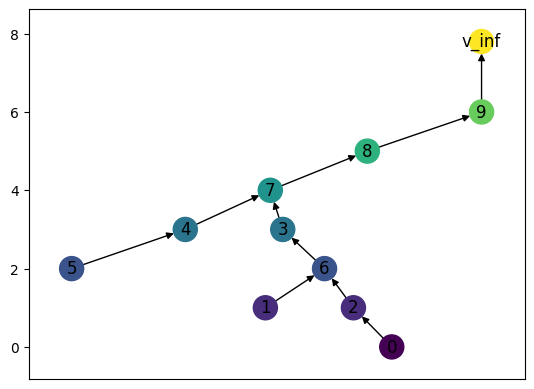

In [2]:
# The default settings for the draw command show the names on each node. 
MT = randomMergeTree(10,  seed = 21)
MT.draw()

As with `ReebGraph`s, we can always manually mess with the drawing locations if we want. Drawing is done by taking a spring layout from networkx, and then forcing the $y$-coordinate to be the same as the function value of the node. Here, we are just making the top string of vertices aligned over vertex 7.

The position of node 7 is (-0.11660480784942846, 4)
The position of node 8 is (0.08886735396991338, 5)
The new position of node 8 is (-0.11660480784942846, 5)


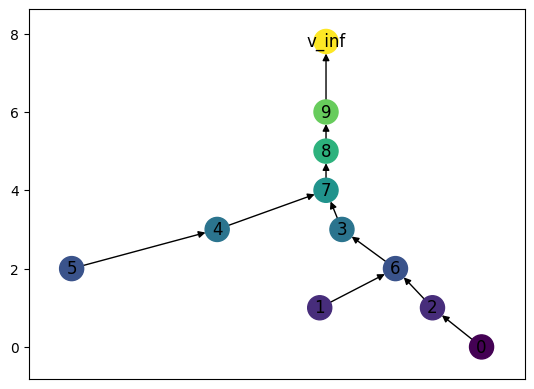

In [3]:
print(f"The position of node 7 is {MT.pos_f[7]}")
print(f"The position of node 8 is {MT.pos_f[8]}")

mid_x = MT.pos_f[7][0]
for v in {8,9,'v_inf'}:
    MT.pos_f[v] = (mid_x, MT.pos_f[v][1])
print(f"The new position of node 8 is {MT.pos_f[8]}")

MT.draw()

As with Reeb Graphs, we can add vertices and edges. Notice that until we actually add all necessary edges and vertices it doesn't satisfy the requirements of a merge tree. 


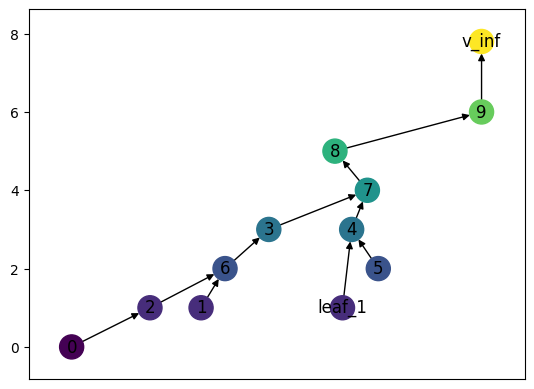

In [4]:
MT.add_node('leaf_1', 1)
MT.add_edge('leaf_1', 4)

# Resetting positions just to get the drawing to look nicer
MT.set_pos_from_f(seed = 13)
MT.draw()

However, if we try to add an edge which creates a loop, the code will throw an error and not allow the edge to be added. For instance, the command 

```
MT.add_edge(3,8)
```

will throw the error


```
ValueError: Edge ((3, 8)) cannot be added. Adding the edge will create a loop in the graph.
```

We can get the list of leaves as well as find the least common ancestor of any pair of vertices. 

In [5]:
print(f"The leaves are {MT.get_leaves()}.")
print(f"The LCA of vertices 5 and 6 is vertex {MT.LCA(5,6)}.")
print(f"The LCA of vertices 0 and 1 is vertex {MT.LCA(0,1)}.")

The leaves are [5, 1, 0, 'leaf_1'].
The LCA of vertices 5 and 6 is vertex 7.
The LCA of vertices 0 and 1 is vertex 6.


The merge trees inherit much of the structure from the `ReebGraph` class. One important addition in the merge tree is the ability to work with labels. This is stored as a dictionary in the class, where `MT.labels[key] = vertex`. Here, we'll give automatic labels to all the leaves of the tree, and add in a few more for good measure. Note that if we add a label to an edge at a function value, we will subdivide the edge to add a vertex before giving it a label. 

In [6]:
MT.label_all_leaves()
MT.add_label(vertex = 6, label = None)
# Note that this adds two labels to the same vertex, which is allowed. 
MT.add_label(vertex = 6, label = 17)
MT.add_label_edge(u=5, v= 4, w = 'hen', f_w = 2.4, label = 37)
print(MT.labels)


{0: 5, 1: 1, 2: 0, 3: 'leaf_1', 4: 6, 17: 6, 37: 'hen'}


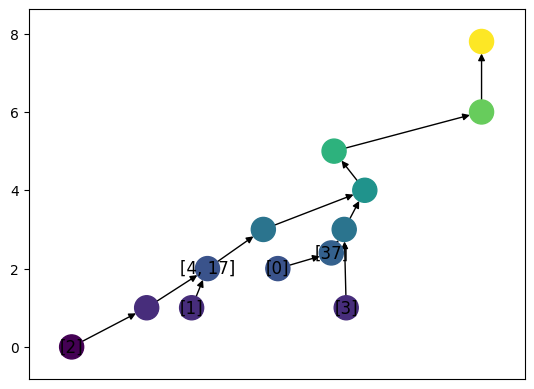

In [7]:
MT.set_pos_from_f(seed = 13)
MT.draw(with_labels = True, label_type="labels")

We can also compute the matrix giving the function value of LCA, either by using the internally defined labels, or by using all leaves. 

In [8]:
# The matrix of LCA for the leabels. Here we ask that it be returned as a pandas data fram so that its easier to read the row and column info. If `return_as_df` is false, it will return just a matrix. 
# Here columns are given by the label key.
MT.LCA_matrix(type = 'labels', return_as_df = True)

,0,1,2,3,4,17,37
0,2.0,4.0,4.0,3.0,4.0,4.0,2.4
1,4.0,1.0,2.0,4.0,2.0,2.0,4.0
2,4.0,2.0,0.0,4.0,2.0,2.0,4.0
3,3.0,4.0,4.0,1.0,4.0,4.0,3.0
4,4.0,2.0,2.0,4.0,2.0,2.0,4.0
17,4.0,2.0,2.0,4.0,2.0,2.0,4.0
37,2.4,4.0,4.0,3.0,4.0,4.0,2.4


In [9]:
# The matrix of LCA for the leaf set. Here columns are given by the leaf name.
MT.LCA_matrix(type = 'leaves', return_as_df = True)

,5,1,0,leaf_1
5,2.0,4.0,4.0,3.0
1,4.0,1.0,2.0,4.0
0,4.0,2.0,0.0,4.0
leaf_1,3.0,4.0,4.0,1.0


## Old stuff down here, to be deleted....

You can also create random merge trees and plot them

In [ ]:
from cereeberus.data.randomMergeTrees import randomMerge
from cereeberus.reeb.merge import mergeTree
R = randomMerge(10)
M = mergeTree(R.G, R.fx)
M.plot_reeb()

#### You can also check if a graph is a merge tree.

This works for both Reeb graphs and Networkx graphs, and it part of the Merge function already

In [ ]:
from cereeberus.compute.merge import isMerge
### Reeb Graph
isMerge(R,R.fx)


In [ ]:
### Networkx Graph
isMerge(R.G,R.fx)

#### To compute a merge tree from a Reeb Graph, we need to first identify any isolates in the graph (nodes with degree 0) and remove them as they will not be going into the merge tree.  Looking at a Reeb graph with isolates:

In [ ]:
jm = reeb.juggling_man()
jm.plot_reeb()

#### Then we can remove isolates and plot

In [ ]:
jm_im = degree.remove_isolates(jm)
jm_im.plot_reeb()

We then import the `computemergetree` function, and provide a filtration.

In [ ]:
from cereeberus.compute.merge import computeMergeTree

In [ ]:
cmt = computeMergeTree(jm_im, verbose=False, precision=1, filter=False)
cmt.plot_reeb()
cmt.fx

We can also compute distances between networkx graphs, reeb graphs, and merge trees.  The first example is the graph edit distance, compliments of the networkx package implementation.

In [ ]:
from cereeberus.compute import distance
distance.edit(cmt, jm_im)